In [131]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
os.chdir('C:\\Users\Lacey\Documents\School\Applied Machine Learning')


In [2]:
#functions for calculating residual square error and age of houses
def error(y,yhat):
    errorList = []
    errorSq = np.square(y - yhat)
    errorList = np.append(errorList, errorSq)
    return(np.sum(errorList))
    
    
def age(year):
    age = 2017-year
    return(age)

def absError(y, yhat):
    avgErrorList = []
    error = np.absolute(((y-yhat)/y))*100
    avgErrorList = np.append(avgErrorList, error)
    average = np.sum(avgErrorList)/len(avgErrorList)
    return(average)
    
    

In [122]:
#load the data and create dummy variable for zipcode and age variables for yr_built and renovated
home = pd.read_csv('home_price.csv')
dummy = pd.get_dummies(home['zipcode'])
home['yr_built'].update(home['yr_built'].map(age(home['yr_built'])))
home['yr_renovated'] = np.where(home['yr_renovated']>0, 1,0)
home


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,30,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,39,1,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,27,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,63,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,87,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,27,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,51,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,32,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,85,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,91,0,98038,47.3684,-122.031,2390,7570


In [123]:
#merge the dataset with dummy variables and split independent and dependent variables
home = home.merge(dummy, left_index=True, right_index=True)
target = home['price']
home = home.drop('date',1)
home = home.drop('price',1)
home = home.drop('zipcode',1)
home = home.drop('id',1)
home2 = home.copy()

In [124]:
#get column names into an object to use later
colnames = home2
x = list(colnames.columns.values)
col=x.copy()
for i in range(0,len(x),1):
    col[i] = str(x[i])
print(col)
col[0]

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', '98001', '98002', '98003', '98004', '98005', '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053', '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107', '98108', '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98122', '98125', '98126', '98133', '98136', '98144', '98146', '98148', '98155', '98166', '98168', '98177', '98178', '98188', '98198', '98199']


'bedrooms'

In [125]:
#create some smaller dataset feature combinations for polynomial modeling
polyTrain = home[['sqft_living',  'sqft_lot', 'floors', 'condition', 'yr_built','yr_renovated', 'bedrooms', 
                  'lat', 'long', 'bathrooms', 'waterfront', 'view', 'grade','sqft_basement', 'sqft_above']]
polyTrain

,sqft_living,sqft_lot,floors,condition,yr_built,yr_renovated,bedrooms,lat,long,bathrooms,waterfront,view,grade,sqft_basement,sqft_above
0,1180,5650,1.0,3,30,0,3,47.5112,-122.257,1.00,0,0,7,0,1180
1,2570,7242,2.0,3,39,1,3,47.7210,-122.319,2.25,0,0,7,400,2170
2,770,10000,1.0,3,27,0,2,47.7379,-122.233,1.00,0,0,6,0,770
3,1960,5000,1.0,5,63,0,4,47.5208,-122.393,3.00,0,0,7,910,1050
4,1680,8080,1.0,3,87,0,3,47.6168,-122.045,2.00,0,0,8,0,1680
5,5420,101930,1.0,3,27,0,4,47.6561,-122.005,4.50,0,0,11,1530,3890
6,1715,6819,2.0,3,51,0,3,47.3097,-122.327,2.25,0,0,7,0,1715
7,1060,9711,1.0,3,32,0,3,47.4095,-122.315,1.50,0,0,7,0,1060
8,1780,7470,1.0,3,85,0,3,47.5123,-122.337,1.00,0,0,7,730,1050
9,1890,6560,2.0,3,91,0,3,47.3684,-122.031,2.50,0,0,7,0,1890


In [126]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
home = scaler.fit_transform(home)
home = pd.DataFrame(home)
print(home)


             0        1         2         3    4    5     6     7         8   \
0      0.090909  0.12500  0.067170  0.003108  0.0  0.0  0.00  0.50  0.500000   
1      0.090909  0.28125  0.172075  0.004072  0.4  0.0  0.00  0.50  0.500000   
2      0.060606  0.12500  0.036226  0.005743  0.0  0.0  0.00  0.50  0.416667   
3      0.121212  0.37500  0.126038  0.002714  0.0  0.0  0.00  1.00  0.500000   
4      0.090909  0.25000  0.104906  0.004579  0.0  0.0  0.00  0.50  0.583333   
5      0.121212  0.56250  0.387170  0.061429  0.0  0.0  0.00  0.50  0.833333   
6      0.090909  0.28125  0.107547  0.003816  0.4  0.0  0.00  0.50  0.500000   
7      0.090909  0.18750  0.058113  0.005567  0.0  0.0  0.00  0.50  0.500000   
8      0.090909  0.12500  0.112453  0.004210  0.0  0.0  0.00  0.50  0.500000   
9      0.090909  0.31250  0.120755  0.003659  0.4  0.0  0.00  0.50  0.500000   
10     0.090909  0.31250  0.246792  0.005619  0.0  0.0  0.00  0.50  0.583333   
11     0.060606  0.12500  0.065660  0.00

In [127]:
polyTrain = scaler.fit_transform(polyTrain)
polyTrain = pd.DataFrame(polyTrain)
polyTrain = polyTrain.rename(columns = {'sqft_living': 0,  'sqft_lot': 1, 'floors':2, 'condition':3, 'yr_built':4,'yr_renovated':5, 'bedrooms':6, 
                  'lat':7, 'long':8, 'bathrooms':9, 'waterfront': 10, 'view':11, 'grade':12, 'sqft_basement':13, 'sqft_above':14})
polyTrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.067170,0.003108,0.0,0.50,0.230088,0.0,0.090909,0.571498,0.217608,0.12500,0.0,0.00,0.500000,0.000000,0.097588
1,0.172075,0.004072,0.4,0.50,0.309735,1.0,0.090909,0.908959,0.166113,0.28125,0.0,0.00,0.500000,0.082988,0.206140
2,0.036226,0.005743,0.0,0.50,0.203540,0.0,0.060606,0.936143,0.237542,0.12500,0.0,0.00,0.416667,0.000000,0.052632
3,0.126038,0.002714,0.0,1.00,0.522124,0.0,0.121212,0.586939,0.104651,0.37500,0.0,0.00,0.500000,0.188797,0.083333
4,0.104906,0.004579,0.0,0.50,0.734513,0.0,0.090909,0.741354,0.393688,0.25000,0.0,0.00,0.583333,0.000000,0.152412
5,0.387170,0.061429,0.0,0.50,0.203540,0.0,0.121212,0.804568,0.426910,0.56250,0.0,0.00,0.833333,0.317427,0.394737
6,0.107547,0.003816,0.4,0.50,0.415929,0.0,0.090909,0.247386,0.159468,0.28125,0.0,0.00,0.500000,0.000000,0.156250
7,0.058113,0.005567,0.0,0.50,0.247788,0.0,0.090909,0.407914,0.169435,0.18750,0.0,0.00,0.500000,0.000000,0.084430
8,0.112453,0.004210,0.0,0.50,0.716814,0.0,0.090909,0.573267,0.151163,0.12500,0.0,0.00,0.500000,0.151452,0.083333
9,0.120755,0.003659,0.4,0.50,0.769912,0.0,0.090909,0.341805,0.405316,0.31250,0.0,0.00,0.500000,0.000000,0.175439


In [128]:
#visualize all features against target value
from pandas.plotting import scatter_matrix

scatter_matrix(polyTrain, alpha=0.2, figsize=(7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F805BA198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027F99DE9198>]], dtype=object)

,0,1
0,0.067170,0.003108
1,0.172075,0.004072
2,0.036226,0.005743
3,0.126038,0.002714
4,0.104906,0.004579
5,0.387170,0.061429
6,0.107547,0.003816
7,0.058113,0.005567
8,0.112453,0.004210
9,0.120755,0.003659


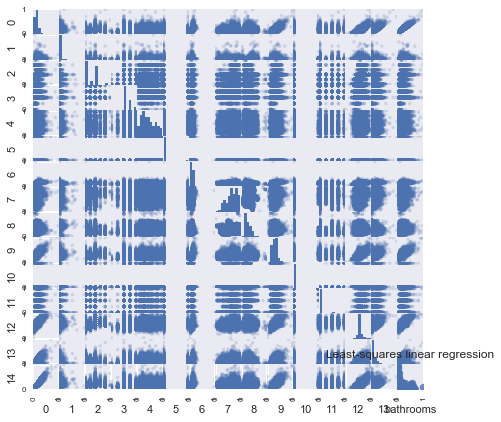

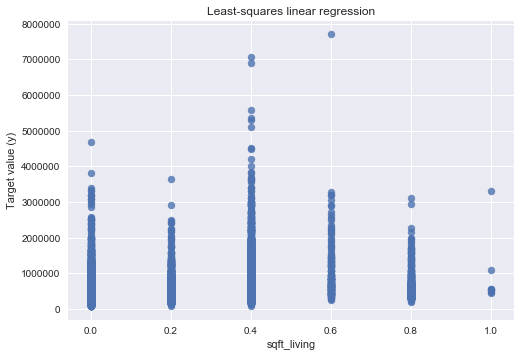

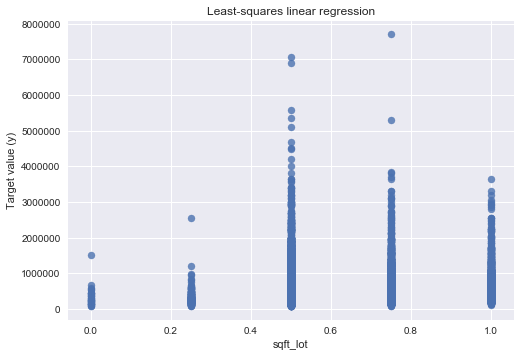

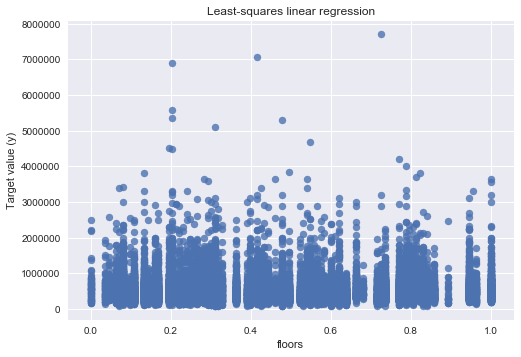

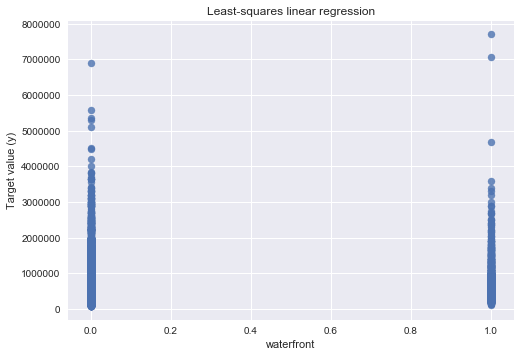

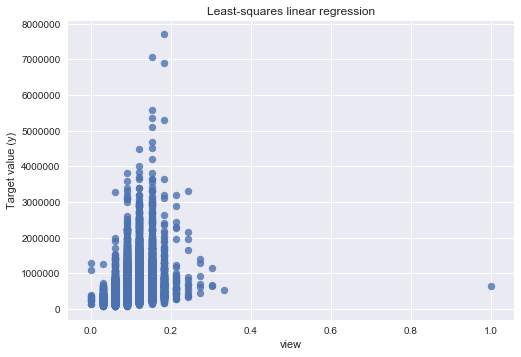

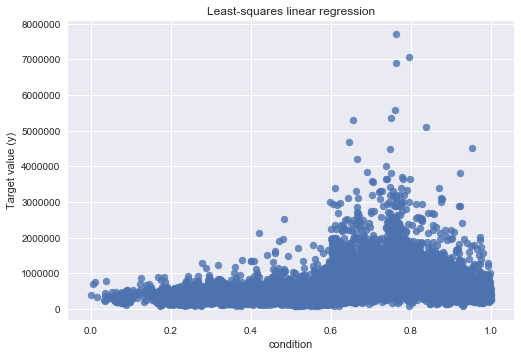

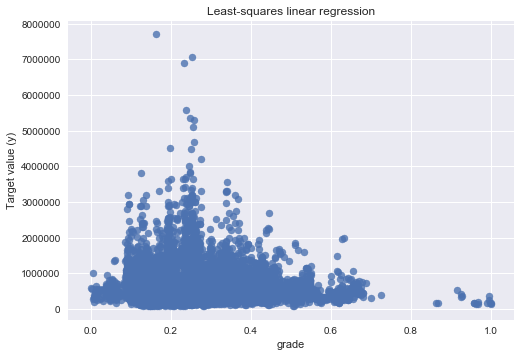

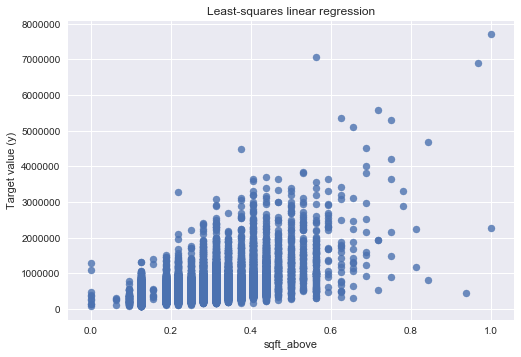

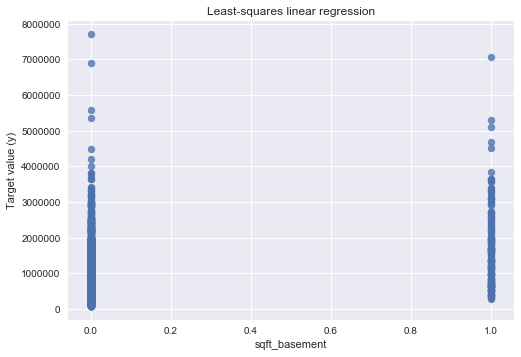

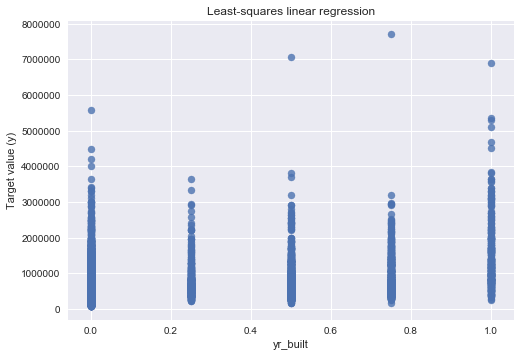

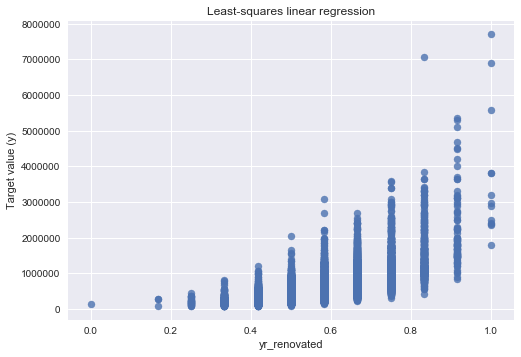

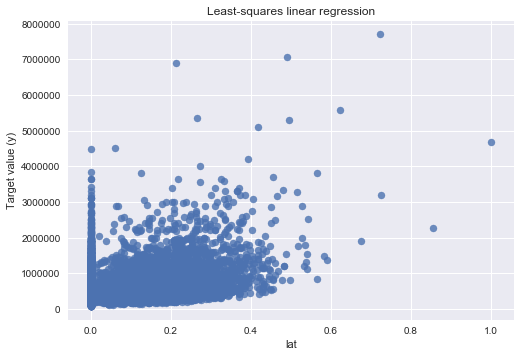

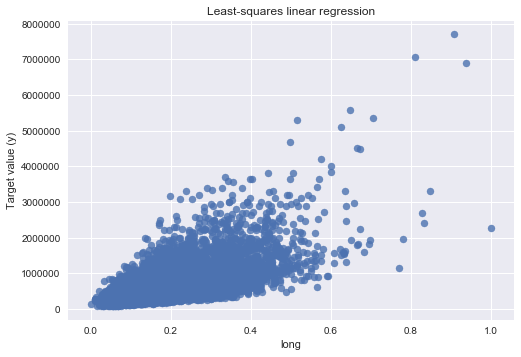

In [129]:
num = range(1,15,1)
for i in num:
    plt.scatter(polyTrain[i], target, marker= 'o', s=50, alpha=0.8)
    plt.title('Least-squares linear regression')
    plt.xlabel(col[i])
    plt.ylabel('Target value (y)')
    plt.show()

In [405]:
#Split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(home, target, train_size=.8,
                                                    test_size = .2, random_state = 0)

#train the linear regression model and score on training set
seq = range(0,87,1)
predictions = []
scores = []
col=[]
RSS = []
AME = []
for y in seq:
    col = np.append(col, y)
    linreg = LinearRegression().fit(X_train[col], y_train)
    predictions = linreg.predict(X_train[col])
    scores = np.append(scores, linreg.score(X_train[col], y_train))
    #calculate the RSS
    RSS = np.append(RSS, error(y_train, predictions))
    #avgError(y_train, predictions)
    AME = np.append(AME, absError(y_train, predictions))
    print(y, scores[y], RSS[y], AME[y])

0 0.0978627878487 2.16347976801e+15 48.9743997486
1 0.278104404145 1.73122945735e+15 43.1168544745
2 0.509019820106 1.1774546836e+15 35.2029625376
3 0.510732348922 1.17334774577e+15 35.2339537836
4 0.510732690538 1.17334692651e+15 35.2302948077
5 0.548603851448 1.08252538704e+15 34.6793799258
6 0.566240823563 1.04022890284e+15 33.8092295523
7 0.572828651968 1.02443016039e+15 33.6313616732
8 0.607069015568 9.42315895624e+14 31.9825907012
9 0.607682148882 9.40845496771e+14 31.8584589594
10 0.607682148882 9.40845496771e+14 31.8584589594
11 0.607709146477 9.40780751909e+14 31.855083133
12 0.613748940431 9.26296290072e+14 31.7560410775
13 0.672346793008 7.85768588972e+14 26.2507273802
14 0.679065587246 7.69655767991e+14 26.5727104804
15 0.680177782712 7.66988532501e+14 26.5316389774
16 0.680803310421 7.65488409765e+14 26.5295395132
17 0.680923177903 7.65200946984e+14 26.549445729
18 0.680946970158 7.65143889076e+14 26.535131373
19 0.68137618039 7.64114569323e+14 26.585951055
20 0.7116691624

In [340]:
#best model includes each possible independent variable
linreg = LinearRegression().fit(X_train, y_train)
testPred = linreg.predict(X_test)
print("Train RSQ:", linreg.score(X_train, y_train), "\nTraining Absolute Percent Error:", 
      absError(y_train, predictions),"\nTraining Residual Sum of Squares:", error(y_train, predictions), 
      "\nTest RSQ:", linreg.score(X_test, y_test), "\nTest Absolute Percent Error:", 
      absError(y_test, testPred),"\nTest Residual Sum of Squares:", error(y_test, testPred))

Train RSQ: 0.806376087078 
Training Absolute Percent Error: 20.0071289766 
Training Residual Sum of Squares: 4.6434335328e+14 
Test RSQ: 0.809728513455 
Test Absolute Percent Error: 19.8827670916 
Test Residual Sum of Squares: 9.78203981142e+13


In [357]:
#Review linear regression coefficients

num = range(0,86,1)
for i,n in zip(col,num):
    print("Feature: ", i, "Coefficient: ", linreg.coef_[n-1])

#find coefficient p-values
params = np.append(linreg.intercept_,linreg.coef_)
predictions = linreg.predict(X_train)

newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).merge(X_train, left_index=True, right_index=True)
MSE = error(y_train, predictions)/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b


p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)
#not original code, found online at: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

Feature:  0.0 Coefficient:  2.1006324413e+16
Feature:  1.0 Coefficient:  -837890.854282
Feature:  2.0 Coefficient:  95273.113759
Feature:  3.0 Coefficient:  -5.267775909e+15
Feature:  4.0 Coefficient:  460687.168523
Feature:  5.0 Coefficient:  -140502.194951
Feature:  6.0 Coefficient:  682698.845197
Feature:  7.0 Coefficient:  226253.217719
Feature:  8.0 Coefficient:  128263.226664
Feature:  9.0 Coefficient:  604643.873622
Feature:  10.0 Coefficient:  3.62582009939e+15
Feature:  11.0 Coefficient:  1.91627772755e+15
Feature:  12.0 Coefficient:  -8716.5
Feature:  13.0 Coefficient:  54935.9375
Feature:  14.0 Coefficient:  122958.0625
Feature:  15.0 Coefficient:  -175229.4375
Feature:  16.0 Coefficient:  66098.25
Feature:  17.0 Coefficient:  -162256.3125
Feature:  18.0 Coefficient:  2.10063244127e+16
Feature:  19.0 Coefficient:  2.10063244127e+16
Feature:  20.0 Coefficient:  2.10063244127e+16
Feature:  21.0 Coefficient:  2.10063244134e+16
Feature:  22.0 Coefficient:  2.10063244129e+16
Feat

C:\Users\Lacey\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Lacey\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Lacey\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Lacey\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [15]:
#Train linear regression models using polynomial transformations on a smaller dataset (excluded zipcode dummies)

X_train, X_test, y_train, y_test = train_test_split(polyTrain, target, train_size=.8,
                                                    test_size = .2, random_state = 0)


degrees = [1,2,3]


polyTrainScore = []
polyTestScore = []

for n in degrees:
    poly = PolynomialFeatures(degree=n,include_bias=False)
    poly.fit(X_train)
    X = poly.transform(X_train)
    linearRegressionTrain = LinearRegression().fit(X, y_train)
    r2Train = linearRegressionTrain.score(X, y_train)
    polyTrainScore = np.append(polyTrainScore,r2Train)
    poly.fit(X_test)
    X1 = poly.transform(X_test)
    r2Test = linearRegressionTrain.score(X1, y_test)
    polyTestScore = np.append(polyTestScore, r2Test)

for n in degrees:
    print("Degree: ", n, "TrainScore: ", polyTrainScore[n-1])
    print("Degree: ", n, "TestScore: ", polyTestScore[n-1])

NameError: name 'LinearRegression' is not defined

In [ ]:
#visualize the scores
plt.plot(degrees, polyTrainScore)
plt.plot(degrees, polyTestScore)
plt.xlabel('Degree')
plt.ylabel('R^2')
plt.show()

In [317]:
#Train linear regression models using polynomial transformations on a larger dataset (included zipcode dummies)

X_train, X_test, y_train, y_test = train_test_split(home, target, train_size=.8,
                                                    test_size = .2, random_state = 0)

degrees = [1,2]


trainScore = []
testScore = []

for n in degrees:
    poly = PolynomialFeatures(degree=n,include_bias=False)
    poly.fit(X_train)
    X = poly.transform(X_train)
    linearRegressionTrain = LinearRegression().fit(X, y_train)
    r2Train = linearRegressionTrain.score(X, y_train)
    trainScore = np.append(trainScore,r2Train)
    poly.fit(X_test)
    X1 = poly.transform(X_test)
    r2Test = linearRegressionTrain.score(X1, y_test)
    testScore = np.append(testScore, r2Test)

for n in degrees:
    print("Degree: ", n, "TrainScore: ", trainScore[n-1])
    print("Degree: ", n, "TestScore: ", testScore[n-1])
    

Degree:  1 TrainScore:  0.806378886121
Degree:  1 TestScore:  0.809756399747
Degree:  2 TrainScore:  0.930124599562
Degree:  2 TestScore:  -1.88346551186e+14


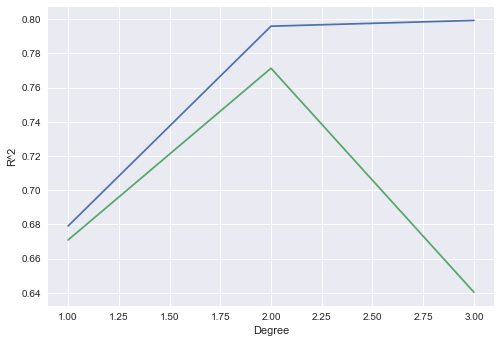

In [206]:
#visualize the scores
plt.plot(degrees, trainScore)
plt.plot(degrees, testScore)
plt.xlabel('Degree')
plt.ylabel('R^2')
plt.show()

In [210]:
#Train linear regression models using a polynomial transformation on various subsets of data

X_train, X_validate, y_train, y_validate = train_test_split(polyTrain, target, train_size=.8, test_size = .2,
                                                   random_state = 0)

degrees = [1,2,3]
rng = [0,1,2,3,4,5,6,7,8,9,10,11,12]
trainSplit = [.25, .5, .8]
testSplit = [.25, .5, .2]
trainScore = []
testScore = []

for i,j in zip(trainSplit, testSplit):
    X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size=i, test_size = j,
                                                   random_state = 0)
    for n,r in zip(degrees, rng):
        poly = PolynomialFeatures(degree=n,include_bias=False)
        poly.fit(X_train)
        X = poly.transform(X_train)
        linearRegressionTrain = LinearRegression().fit(X, y_train)
        r2Train = linearRegressionTrain.score(X, y_train)
        trainScore = np.append(trainScore,r2Train)
        poly.fit(X_validate)
        X1 = poly.transform(X_validate)
        r2Test = linearRegressionTrain.score(X1, y_validate)
        testScore = np.append(testScore, r2Test)
        print("Data Transformation: ", i,n, trainScore)
        print("Data Transformation: ", j,n, testScore)



Data Transformation:  0.25 1 [ 0.67707456]
Data Transformation:  0.25 1 [ 0.68425233]
Data Transformation:  0.25 2 [ 0.67707456  0.78032046]
Data Transformation:  0.25 2 [ 0.68425233  0.78327114]
Data Transformation:  0.5 1 [ 0.67707456  0.78032046  0.67584429]
Data Transformation:  0.5 1 [ 0.68425233  0.78327114  0.66720244]
Data Transformation:  0.5 2 [ 0.67707456  0.78032046  0.67584429  0.80154265]
Data Transformation:  0.5 2 [ 0.68425233  0.78327114  0.66720244  0.48050367]
Data Transformation:  0.8 1 [ 0.67707456  0.78032046  0.67584429  0.80154265  0.68342712]
Data Transformation:  0.2 1 [ 0.68425233  0.78327114  0.66720244  0.48050367  0.64358956]
Data Transformation:  0.8 2 [ 0.67707456  0.78032046  0.67584429  0.80154265  0.68342712  0.79733356]
Data Transformation:  0.2 2 [ 0.68425233  0.78327114  0.66720244  0.48050367  0.64358956  0.74657467]


[ 0.67707456  0.78032046  0.67584429  0.80154265  0.68342712  0.79733356]
[ 0.68425233  0.78327114  0.66720244  0.48050367  0.64358956  0.74657467]


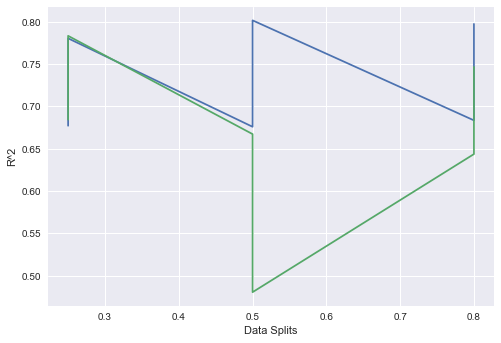

In [212]:
#visualize the model accuracy from various subests of data by degree
print(trainScore)
print(testScore)
trainDegreeSplit = [.25,.25,.5,.5,.8,.8]
plt.plot(trainDegreeSplit, trainScore)
plt.plot(trainDegreeSplit, testScore)
plt.xlabel('Data Splits')
plt.ylabel('R^2')
plt.show()
#The best transformation is power of two using an 80/20 split on train-test data.

In [ ]:
#Part 3- Ridge and Lasso regression fits with poly transformations
#Split data with 80-20% split
X_train, X_test, y_train, y_test = train_test_split(polyTrain, target, train_size=.8, test_size = .2,
                                                   random_state = 0)

deg = [1,2,3]
alpha = [.0001,.001,.01,.1,1,2]
L2_train_score = []
L1_train_score = []


for i in deg:
    poly = PolynomialFeatures(degree=i,include_bias=False)
    poly.fit(X_train)
    X = poly.transform(X_train)
    for a in alpha:
        L2reg = Ridge(alpha = a).fit(X, y_train)
        L2r2_train = L2reg.score(X,y_train)
        L2_train_score = np.append(L2_train_score, L2r2_train)
        L1reg = Lasso(alpha = a, max_iter= 10000).fit(X, y_train)
        L1r2_train = L1reg.score(X,y_train)
        L1_train_score = np.append(L1_train_score, L1r2_train)
        

num = range(0,18,1)
cnt = 0
for i in deg:
    for a in alpha:
        if cnt < 19:
            print("Degree: ", i, "Alpha: ",a, "Ridge Score: ", L2_train_score[cnt], "Lasso Score: ", L1_train_score[cnt])
            cnt += 1

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


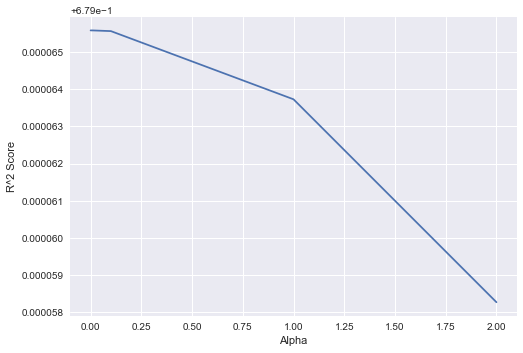

In [278]:
#Ridge Regression Accuracy for Degree 1 Polynomial Transformation
plt.plot(alpha,L2_train_score[0:6])
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.show()

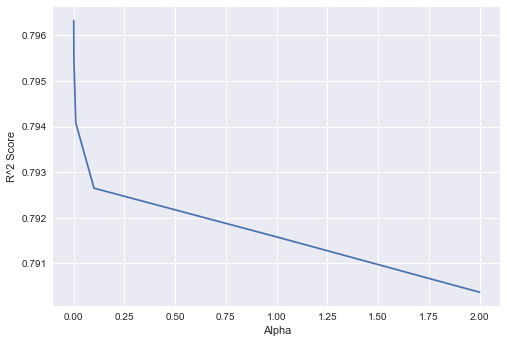

In [272]:
#Ridge Regression Accuracy for Degree 2 transformation
plt.plot(L2_train_score[6:12], alpha)
plt.xlabel('R^2 Score')
plt.ylabel('Alpha')
plt.show()

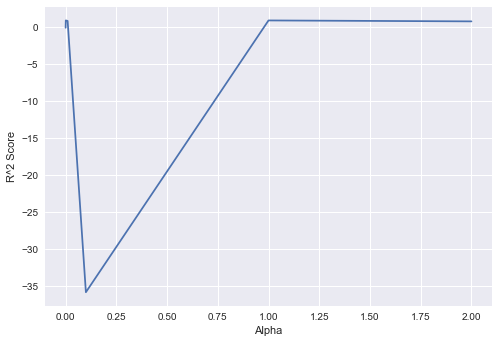

In [273]:
#Ridge Regression Accuracy for Degree 3 transformation
plt.plot(alpha, L2_train_score[12:18])
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')

plt.show()

In [109]:
#Running ridge and lasso regressions using validation curves to aid in best alpha selection

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(home, target, train_size=.8, test_size = .2,
                                                   random_state = 0)
poly = PolynomialFeatures(degree=2,include_bias=False)
poly.fit(X_train)
X = poly.transform(X_train)
X1 = poly.transform(X_test)

alpha = np.logspace(-4, 1, 9)
ridge_train_scores, ridge_test_scores = validation_curve(Ridge(), X, y_train,
                                            param_name='alpha',
                                            param_range=alpha, cv=3)

lasso_train_scores, lasso_test_scores = validation_curve(Lasso(), X, y_train,
                                            param_name='alpha',
                                            param_range=alpha, cv=3)

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

In [110]:
#calculate the mean scores of the folds and compare to alphas
meanRange = range(0,9,1)
ridgeMeanTrainScores = []
ridgeMeanTestScores = []
for i in meanRange:
    trainMean = np.mean(ridge_train_scores[i])
    testMean = np.mean(ridge_test_scores[i])
    ridgeMeanTrainScores = np.append(ridgeMeanTrainScores,trainMean)
    ridgeMeanTestScores = np.append(ridgeMeanTestScores,testMean)
    print("alpha: ", alpha[i], "Fold's Train Score: ", ridgeMeanTrainScores[i], 'Folds Test Score: ', ridgeMeanTestScores[i])

alpha:  0.0001 Fold's Train Score:  0.935666178972 Folds Test Score:  0.882540016086
alpha:  0.000421696503429 Fold's Train Score:  0.934986360981 Folds Test Score:  0.884302036857
alpha:  0.00177827941004 Fold's Train Score:  0.933902824726 Folds Test Score:  0.886150732356
alpha:  0.00749894209332 Fold's Train Score:  0.932060185835 Folds Test Score:  0.887174197321
alpha:  0.0316227766017 Fold's Train Score:  0.929006653518 Folds Test Score:  0.88809539353
alpha:  0.133352143216 Fold's Train Score:  0.924634031682 Folds Test Score:  0.888951993591
alpha:  0.56234132519 Fold's Train Score:  0.918179660668 Folds Test Score:  0.888016915925
alpha:  2.37137370566 Fold's Train Score:  0.907318336793 Folds Test Score:  0.882828725209
alpha:  10.0 Fold's Train Score:  0.888736363351 Folds Test Score:  0.871020516105


In [113]:
#calculate the mean scores of the folds and compare to alphas
meanRange = range(0,9,1)
lassoMeanTrainScores = []
lassoMeanTestScores = []
for i in meanRange:
    trainMean = np.mean(lasso_train_scores[i])
    testMean = np.mean(lasso_test_scores[i])
    lassoMeanTrainScores = np.append(lassoMeanTrainScores,trainMean)
    lassoMeanTestScores = np.append(lassoMeanTestScores,testMean)
    print("alpha: ", alpha[i], "Fold's Train Score: ", lassoMeanTrainScores[i],"Fold's Test Score: ", lassoMeanTestScores[i])

alpha:  0.0001 Fold's Train Score:  0.933959592622 Fold's Test Score:  0.874514287124
alpha:  0.000421696503429 Fold's Train Score:  0.933959609173 Fold's Test Score:  0.874541793884
alpha:  0.00177827941004 Fold's Train Score:  0.933959502567 Fold's Test Score:  0.87465699091
alpha:  0.00749894209332 Fold's Train Score:  0.933956761385 Fold's Test Score:  0.875125694229
alpha:  0.0316227766017 Fold's Train Score:  0.933912611873 Fold's Test Score:  0.876836325827
alpha:  0.133352143216 Fold's Train Score:  0.933541140718 Fold's Test Score:  0.881098750281
alpha:  0.56234132519 Fold's Train Score:  0.931772820446 Fold's Test Score:  0.885596533236
alpha:  2.37137370566 Fold's Train Score:  0.928051170393 Fold's Test Score:  0.888634248567
alpha:  10.0 Fold's Train Score:  0.919995782351 Fold's Test Score:  0.888889704054


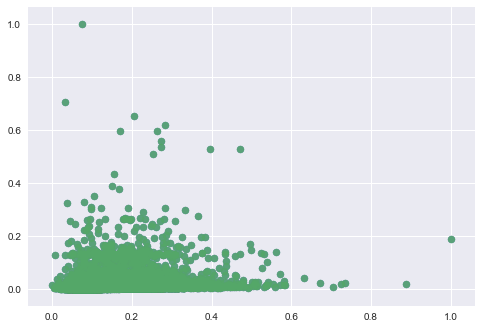

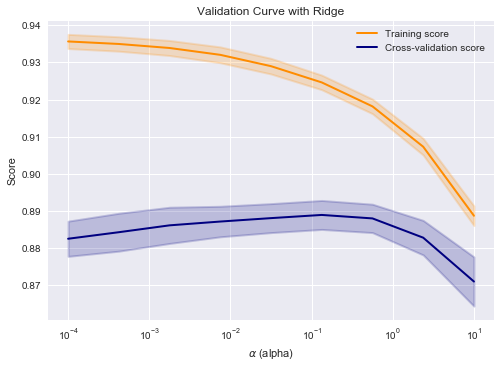

In [136]:
plt.figure()

train_scores_mean = np.mean(ridge_train_scores, axis=1)
train_scores_std = np.std(ridge_train_scores, axis=1)
test_scores_mean = np.mean(ridge_test_scores, axis=1)
test_scores_std = np.std(ridge_test_scores, axis=1)

param_range = np.logspace(-4, 1, 9)
plt.title('Validation Curve with Ridge')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
#plt.ylim(0.7, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

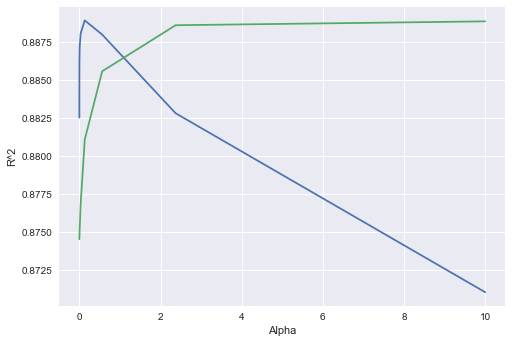

In [115]:
#validation plots
#Ridge regression model with a poly degree transformation of 2
plt.plot(alpha, ridgeMeanTestScores)
plt.plot(alpha, lassoMeanTestScores)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.show()

In [118]:
#Best Model - lasso regression with best alpha is approximately 2.317
linlasso = Lasso(alpha=alpha[7], max_iter = 10000).fit(X, y_train)

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [121]:
seq = range(0,87,1)
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
for i,j in zip(col,seq):
    print("Feature: ", i, "\nRegularized Coefficient: ", linlasso.coef_[j])
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('Dropped features: {}'
     .format(np.sum(linlasso.coef_ == 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X1, y_test)))
print('Residual Sum of Squared Errors: ', error(y_test, linlasso.predict(X1)))
print('Absolute Mean Percentage Error: ', absError(y_test, linlasso.predict(X1)))

lasso regression linear model intercept: 247191.96523464302
Feature:  bedrooms 
Regularized Coefficient:  221170.361253
Feature:  bathrooms 
Regularized Coefficient:  -53970.2668742
Feature:  sqft_living 
Regularized Coefficient:  -742050.022328
Feature:  sqft_lot 
Regularized Coefficient:  0.0
Feature:  floors 
Regularized Coefficient:  122422.746299
Feature:  waterfront 
Regularized Coefficient:  -358804.82047
Feature:  view 
Regularized Coefficient:  -169510.765969
Feature:  condition 
Regularized Coefficient:  21016.0158318
Feature:  grade 
Regularized Coefficient:  -412198.289532
Feature:  sqft_above 
Regularized Coefficient:  -15423.8777338
Feature:  sqft_basement 
Regularized Coefficient:  -125649.413757
Feature:  yr_built 
Regularized Coefficient:  -3810.64649844
Feature:  yr_renovated 
Regularized Coefficient:  -12047.8903705
Feature:  lat 
Regularized Coefficient:  369492.631668
Feature:  long 
Regularized Coefficient:  96387.7856176
Feature:  sqft_living15 
Regularized Coeff

In [99]:
#Part 4 - training KNN Regression model using training/validation sets on various values for k
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(home, target, random_state = 0)
validation_fold = [1,2,3,4,5]
k_val = range(1,6,1)
knnTrainScores = []
knnValScores = []
meanTrain = []
meanVal = []
combine = range(0,25,1)
for i in k_val:
    knnreg = KNeighborsRegressor(n_neighbors = i)
    for j,n in zip(validation_fold,combine):
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 0)
        knnreg.fit(X_train, y_train)
        knnTrainScores = np.append(knnTrainScores, knnreg.score(X_train, y_train))
        knnValScores = np.append(knnValScores, knnreg.score(X_val, y_val))

In [102]:
#print out results
cnt = 0
for i in k_val:
    for j in validation_fold:
            print("K Value: ", i, "Fold: ",j, "Training Score: ", knnTrainScores[cnt], "Validation Score: ", knnValScores[cnt])
            cnt += 1

K Value:  1 Fold:  1 Training Score:  0.999113887246 Validation Score:  0.689941010111
K Value:  1 Fold:  2 Training Score:  0.999370649745 Validation Score:  0.667558050504
K Value:  1 Fold:  3 Training Score:  0.999509851323 Validation Score:  0.618429687436
K Value:  1 Fold:  4 Training Score:  0.999590345105 Validation Score:  0.628412293555
K Value:  1 Fold:  5 Training Score:  0.99982715105 Validation Score:  0.59809719443
K Value:  2 Fold:  1 Training Score:  0.881239147728 Validation Score:  0.663552314235
K Value:  2 Fold:  2 Training Score:  0.898947866544 Validation Score:  0.522439015551
K Value:  2 Fold:  3 Training Score:  0.866632150305 Validation Score:  0.710303902086
K Value:  2 Fold:  4 Training Score:  0.854185585546 Validation Score:  0.650287168739
K Value:  2 Fold:  5 Training Score:  0.846503951642 Validation Score:  0.544658944922
K Value:  3 Fold:  1 Training Score:  0.736528166428 Validation Score:  0.515245470706
K Value:  3 Fold:  2 Training Score:  0.72568

In [87]:
#Get mean scores 
start = [0,5,10,15,20]
stop = [4,11,16,21,26]
k_val = range(1,6,1)
for c,d,k in zip(start,stop,k_val):
    meanTrain = np.append(meanTrain, np.mean(knnTrainScores[c:d]))
    meanVal = np.append(meanVal, np.mean(knnValScores[c:d]))
    print("K Value: ", k, "Mean Training Score: ", meanTrain[k-1], "Mean Testing Score: ", meanVal[k-1])

K Value:  1 Mean Training Score:  0.999482376894 Mean Testing Score:  0.640487647207
K Value:  2 Mean Training Score:  0.869501740353 Mean Testing Score:  0.618248269106
K Value:  3 Mean Training Score:  0.73983483887 Mean Testing Score:  0.447283969874
K Value:  4 Mean Training Score:  0.627173754065 Mean Testing Score:  0.0989037395355
K Value:  5 Mean Training Score:  0.54003250215 Mean Testing Score:  -0.236013868207


In [106]:
#Predict Housing Prices, best k value is 1
X_train, X_test, y_train, y_test = train_test_split(home, target, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors = 1)
knnreg.fit(X_train, y_train)
knnPreds = knnreg.predict(X_test)
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))
print('Residual Sum of Squared Errors: ', error(y_test, knnPreds))
print("Absolute Percent Mean Error: ", absError(y_test, knnPreds))

R-squared test score: 0.696
Residual Sum of Squared Errors:  2.1794529108e+14
Absolute Percent Mean Error:  19.3393898643


In [25]:
avg_zip_price = home['price'].groupby(home['zipcode']).mean()
avg_zip_price.idxmax()


98039

In [50]:
sqftLive = home['sqft_living']
sqftLive
cnt = 0

for x in sqftLive:
    if 2000 < x < 4000:
        cnt = cnt +1
    percent = cnt/len(sqftLive) * 100
print('Percent: {:1f}%'.format(percent))

Percent: 42.155184%
